In [6]:
import torch
import torch.nn as nn
import torchvision
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [8]:
class SuperRes(nn.Module):
  def __init__(self):
    super(SuperRes, self).__init__()

    self.layer1 = nn.Sequential(
      nn.ConvTranspose2d(3, 16, 4, 2, 1),
      nn.LeakyReLU(0.2),
    )

    self.layer2 = nn.Sequential(
      nn.ConvTranspose2d(16, 32, 4, 2, 1),
      nn.LeakyReLU(0.2),
    )

    self.layer3 = nn.Sequential(
      nn.ConvTranspose2d(32, 64, 4, 2, 1),
      nn.LeakyReLU(0.2),
    )

    self.layer4 = nn.Sequential(
      nn.ConvTranspose2d(64, 3, 4, 2, 1),
      nn.Tanh()
    )

  def forward(self, x):
    output = self.layer1(x)
    output = self.layer2(output)
    output = self.layer3(output)
    output = self.layer4(output)
    return output

device = "cuda"
res = SuperRes().to(device)
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(res.parameters())

In [10]:
model = torch.load("./superresSave.model")

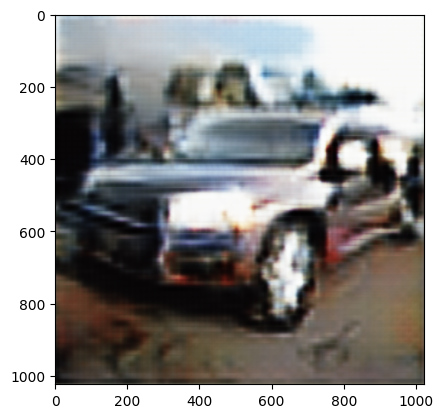

In [15]:
lowImgSize = 64
lowFilter = torchvision.transforms.Compose([torchvision.transforms.Resize(lowImgSize), torchvision.transforms.CenterCrop(lowImgSize), torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((.5, .5, .5), (.5, .5, .5))])
test_image = Image.open("./image2.png").convert('RGB')
plt.imshow((model(lowFilter(test_image).to(device)).cpu().detach().permute(1, 2, 0)+1)/2)